In [1]:
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
import numpy as np

In [2]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

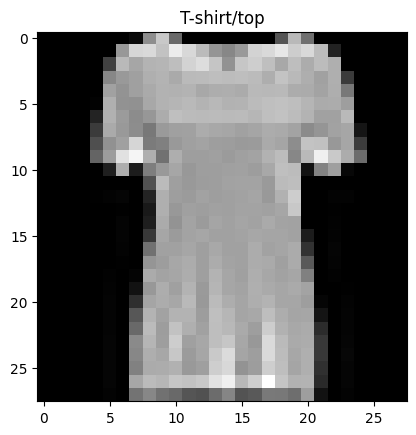

In [5]:
plt.imshow(x_train[10], cmap="gray")
plt.title(class_names[y_train[10]])
plt.show()

### Data Preparation

In [6]:
y_train_ohe = to_categorical(y_train)
y_test_ohe = to_categorical(y_test)

In [8]:
x_train = x_train.reshape(60000, 28, 28, 1)/255
x_test = x_test.reshape(10000, 28, 28, 1)/255

In [9]:
print(x_train.shape)
print(y_train_ohe.shape)
print(x_test.shape)
print(y_test_ohe.shape)

(60000, 28, 28, 1)
(60000, 10)
(10000, 28, 28, 1)
(10000, 10)


### Model Building

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten, Activation, MaxPool2D

In [13]:
model = Sequential()
model.add(Conv2D(filters=3, kernel_size=(3,3)))
model.add(Activation("relu"))
model.add(Flatten())
model.add(Dense(10, activation = "softmax"))

In [14]:
model.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

In [16]:
model.fit(x=x_train,
          y=y_train_ohe,
          batch_size=1500,
          validation_data=(x_test, y_test_ohe),
          epochs=25)

Epoch 1/25
40/40 ━━━━━━━━━━━━━━━━━━━━ 9s 217ms/step - accuracy: 0.6903 - loss: 1.1593 - val_accuracy: 0.6962 - val_loss: 1.1241
Epoch 2/25
40/40 ━━━━━━━━━━━━━━━━━━━━ 8s 208ms/step - accuracy: 0.7010 - loss: 1.1020 - val_accuracy: 0.6989 - val_loss: 1.0798
Epoch 3/25
40/40 ━━━━━━━━━━━━━━━━━━━━ 11s 229ms/step - accuracy: 0.6984 - loss: 1.0641 - val_accuracy: 0.7035 - val_loss: 1.0409
Epoch 4/25
40/40 ━━━━━━━━━━━━━━━━━━━━ 11s 251ms/step - accuracy: 0.7048 - loss: 1.0239 - val_accuracy: 0.7035 - val_loss: 1.0067
Epoch 5/25
40/40 ━━━━━━━━━━━━━━━━━━━━ 8s 191ms/step - accuracy: 0.7092 - loss: 0.9895 - val_accuracy: 0.7091 - val_loss: 0.9761
Epoch 6/25
40/40 ━━━━━━━━━━━━━━━━━━━━ 9s 232ms/step - accuracy: 0.7143 - loss: 0.9630 - val_accuracy: 0.7112 - val_loss: 0.9492
Epoch 7/25
40/40 ━━━━━━━━━━━━━━━━━━━━ 9s 220ms/step - accuracy: 0.7167 - loss: 0.9339 - val_accuracy: 0.7146 - val_loss: 0.9254
Epoch 8/25
40/40 ━━━━━━━━━━━━━━━━━━━━ 9s 198ms/step - accuracy: 0.7184 - loss: 0.9112 - val_accuracy: 

In [17]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)                    │ (1000, 26, 26, 3)           │              30 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (1000, 26, 26, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (1000, 2028)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (1000, 10)                  │          20,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 60,962 (238.14 KB)

 Trainable params: 20,320 (79.38 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 40,642 (158.76 KB)

In [18]:
preds = model.predict(x_test)
preds_class = np.argmax(preds, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


In [19]:
range(100, 110)

range(100, 110)

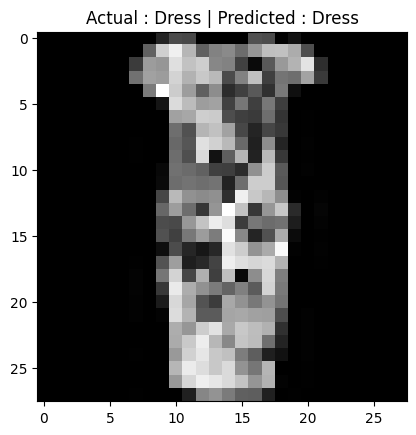

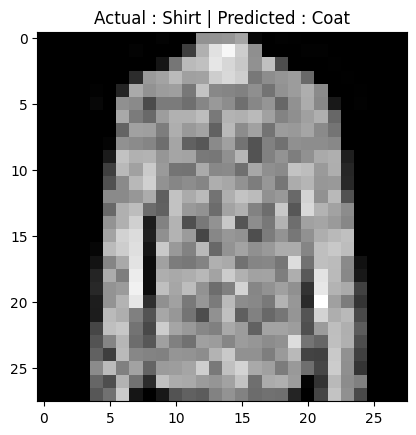

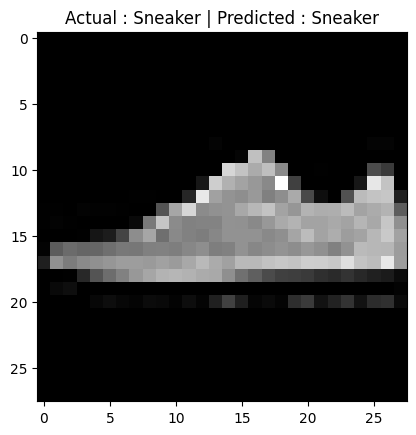

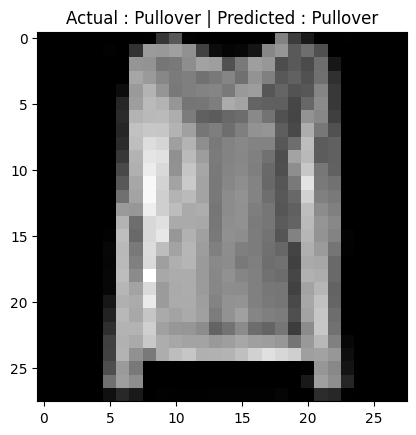

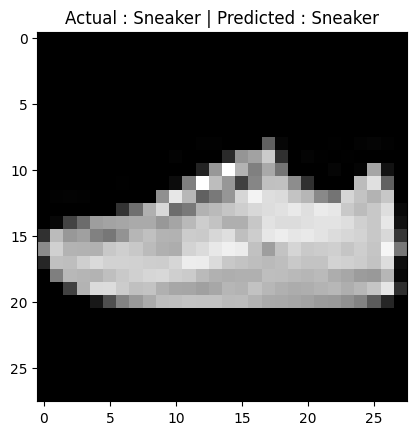

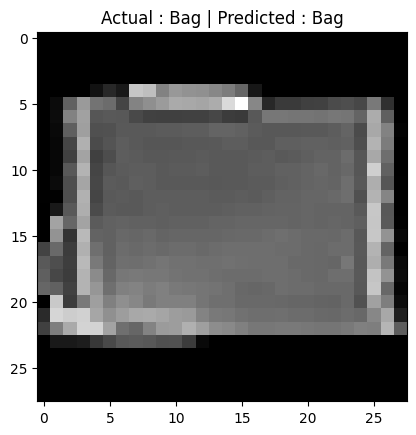

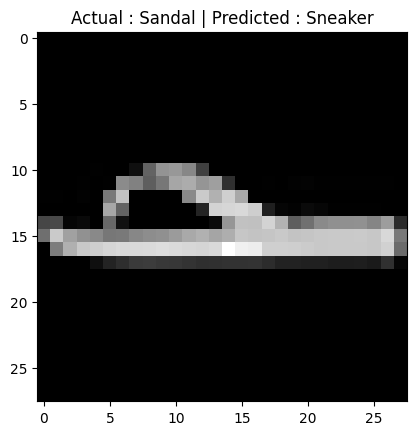

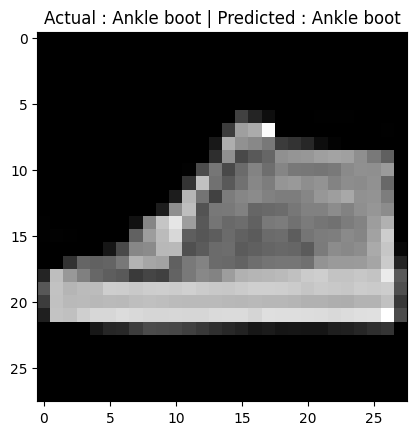

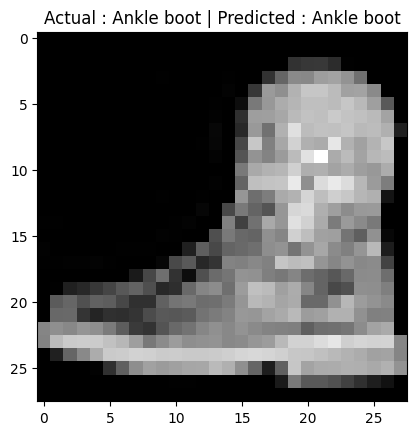

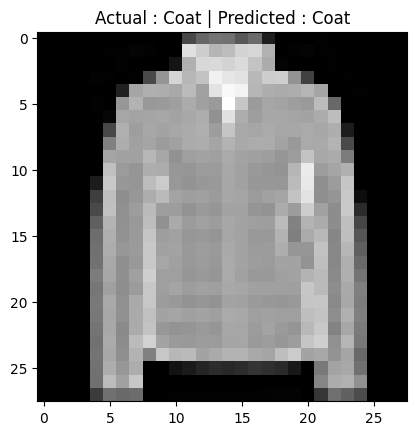

In [20]:
for n in range(100, 110):
    plt.imshow(x_test[n].reshape(28,28), cmap="gray")
    plt.title(f"Actual : {class_names[y_test[n]]} | Predicted : {class_names[preds_class[n]]}")
    plt.show()